# Assignment 1: ML workflow with scikit-learn
## Description
In this lab you will have a chance to develop a machine learning pipeline that recognises hand-written digits. The dataset that you will use for this assignment is [MNIST](http://yann.lecun.com/exdb/mnist/): 27x27 pixels grayscale images.  
In this assignment you are asked to pick any 2 digits: `0, 1, 2, 3, 4, 5, 6, 7, 8, 9`, from the MNIST dataset (500 random samples per chosen digit). Then extract any 2 selected features from the ones prepared for you: `f1, f2, f3, f4, f5, f6, f7, f8, f9`.

Once you have prepared the dataset you need to choose a machine learning algorithm from `scikit-learn` and apply it. You need to decide how to evaluate your results (cross-validation, training-test split, etc.), what performance metric to use and how to report your results. Motivate all your choices.

To get you started you are given the dataset loader and two functions:
* `pick_digits`, and
* `pick_features`;

together with and an example how to use them.

One thing you might want to do is to plot the decision boundaries. Lab3 showed how to do this for a linear classifier, but for other classifiers this can be a bit more involved. One way to visualise decision regions is to colour-code the predictions of the classifier over a mesh grid (see [link](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) to NearestNeighbors in scikit-learn). Another possibility is to calculate posterior class probabilities over a mesh grid and draw a contour line at p=$\frac{1}{2}$ (see [link](http://matplotlib.org/examples/pylab_examples/contour_demo.html) to matplotlib contour demo).

## Marking criteria
* 30% - develop one working solution;
* 10% - support it with relevant plots and figures eg. data scatter plot with decision boundary, predictive accuracy;
---
* 20% - develop another working solution of different type;
* 10% - support it with relevant plots and figures eg. data scatter plot with decision boundary, predictive accuracy;
---
* 10% - motivate your choices (5% per solution);
* 10% - create a baseline for your dataset;
* 10% - compare your results against each other (5%) and the baseline (5%).
---

Please put all your working and comments in this Jupyter notebook and submit it as **the only** file with name `<your_candidate_number>.ipynb` eg. `12321.ipynb`. If you do not use this naming convention **20%** will be subtracted from your mark!

In [1]:
# Import all necessary packages
import math
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [2]:
# Load and reformat the data
data = pd.DataFrame(mnist.data)
data["label"] = mnist.target

In [3]:
# Pick selected digits from the dataset; random sample 500 instances
# for each selected digit
def pick_digits(l, d, random_sample=500, seed=42):
    digits = []
    for i in l:
        digit = d[d.label == i]
        digits.append(digit.sample(random_sample, random_state=seed))
    return pd.concat(digits)

# Compute selected features
def pick_features(l, d):
    df = d.copy()
    df.drop("label", axis=1, inplace=True)
    
    features = pd.DataFrame(d["label"])
    for i in l:
        features[i] = np.nan
    
    for index, row in df.iterrows():
        if "f1" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 1 < image_row and image_row < 8:
                    sum += i
            features["f1"][index] = sum
        if "f2" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 10 < image_row and image_row < 17:
                    sum += i
            features["f2"][index] = sum
        if "f3" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                if 19 < image_row and image_row < 26:
                    sum += i
            features["f3"][index] = sum

        if "f4" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 1 < image_col and image_col < 8:
                    sum += i
            features["f4"][index] = sum
        if "f5" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 10 < image_col and image_col < 17:
                    sum += i
            features["f5"][index] = sum
        if "f6" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_col = ii%28
                if 19 < image_col and image_col < 26:
                    sum += i
            features["f6"][index] = sum

        if "f7" in l:
            sum = 0
            for i in range(1, 28):
                j = i - 1
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 28):
                j = i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 27):
                j = i + 1
                ind = j * 28 + i
                sum += row[ind]
            features["f7"][index] = sum
        if "f8" in l:
            sum = 0
            for i in range(1, 28):
                j = i - 1
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 28):
                j = i
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            for i in range(0, 27):
                j = i + 1
                i = 27 - i
                ind = j * 28 + i
                sum += row[ind]
            features["f8"][index] = sum

        if "f9" in l:
            sum = 0
            for ii, i in row.iteritems():
                image_row = math.floor(ii/28.0)
                image_col = ii%28
                if 10 < image_row and image_row < 17 and 10 < image_col and image_col < 17:
                    sum += i
            features["f9"][index] = sum

    return features

One can use a confusion matrix in order to choose appropriate features.

Predictive accuracy for classifier #1: SVC classifier: 0.997


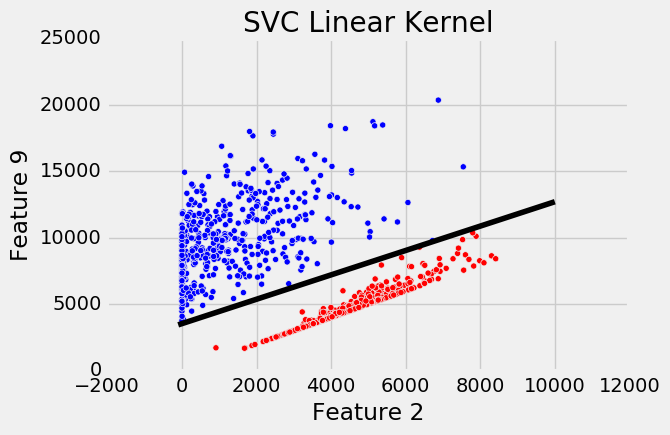

Predictive accuracy for classifier #2: Gaussian Naive Bayes: 0.932


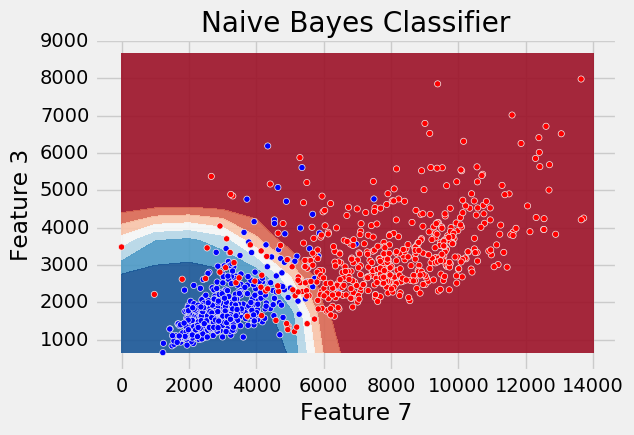

Predictive accuracy for baseline against the naive bayes festure set: 0.504
Predictive accuracy for baseline against the SVC Feature Set: 0.496


In [4]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt2
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold
from sklearn import neighbors
from random import randint

classifier_SVC  = SVC()
classifier_NB   = GaussianNB()

n_neighbors     = 15
k               = 10

digit_1         = 1
digit_2         = 0

feature_1       = "f2"
feature_2       = "f9"

feature_3       = "f3"
feature_4       = "f7"

x               = pick_digits([digit_1,digit_2], data)
y               = pick_features([feature_1, feature_2], x)
q               = pick_features([feature_3, feature_4], x)

y.index         = range(1000)
y_labels        = y["label"].values
q.index         = range(1000)
q_labels        = q["label"].values
skf             = StratifiedKFold(y_labels, n_folds=k)
skf_2           = StratifiedKFold(q_labels, n_folds=k)

acc_per_fold_SVC    = []
acc_per_fold_KNN    = []

plt.style.use("fivethirtyeight")
plt2.style.use("fivethirtyeight")

for train_index, test_index in skf:
    
    # Classifier One:
    classifier_SVC     = SVC(kernel="linear")
    classifier_SVC     = classifier_SVC.fit(y[[feature_2, feature_1]].loc[train_index], y["label"].loc[train_index])
    predicted_SVC      = classifier_SVC.predict(y[[feature_2, feature_1]].loc[test_index])
    acc_per_fold_SVC.append( accuracy_score(y["label"].loc[test_index], predicted_SVC) )

for train_index, test_index in skf_2:
    
    # Classifier Two:
    classifier_NB   = classifier_NB.fit(q[[feature_3, feature_4]].loc[train_index], q["label"].loc[train_index])
    predicted       = classifier_NB.predict(q[[feature_3, feature_4]].loc[test_index])
    acc_per_fold_KNN.append( accuracy_score(q["label"].loc[test_index], predicted) )
    
    
print "Predictive accuracy for classifier #1: SVC classifier:", np.mean(acc_per_fold_SVC)

colour_map_SVC = []
for i in y["label"].values:
    if i == digit_1:
        colour_map_SVC.append("red")
    else:
        colour_map_SVC.append("blue")
        
colour_map_NB = []
for i in q["label"].values:
    if i == digit_1:
        colour_map_NB.append("blue")
    else:
        colour_map_NB.append("red")

plt.scatter(y[feature_2], y[feature_1], c=colour_map_SVC)

w = classifier_SVC.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-100, 10000)
yy = a * xx - (classifier_SVC.intercept_[0]) / w[1]
plt.plot(xx, yy, "k-")
plt.title('SVC Linear Kernel')
plt.xlabel('Feature 2')
plt.ylabel('Feature 9')
plt.show()
plt.clf()

print "Predictive accuracy for classifier #2: Gaussian Naive Bayes:", np.mean(acc_per_fold_KNN)

# This is all extra stuff: 
h = 1000
x_min, x_max = q[feature_3].values.min(), q[feature_3].values.max() + 1000
y_min, y_max = q[feature_4].values.min(), q[feature_4].values.max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier_NB.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
cm = plt2.cm.RdBu
plt2.contourf(xx, yy, Z, cmap=cm, alpha=.9)

plt2.scatter(q[feature_3], q[feature_4], c=colour_map_NB)
plt2.title('Naive Bayes Classifier')
plt2.ylabel('Feature 3')
plt2.xlabel('Feature 7')
plt2.show()


# Baseline (majority class)


baseline_accuracy = []
predicted         = []

for train_index, test_index in skf:
#     Pick randomly
#     Take an element from the test_index and classify randomly
    predicted         = []
    for i in range(0,100):
        predicted.append(randint(0,1))
    baseline_accuracy.append(accuracy_score(q["label"].loc[test_index], predicted))
    
print "Predictive accuracy for baseline against the naive bayes festure set:", np.mean(baseline_accuracy)

baseline_accuracy = []

for train_index, test_index in skf:
#     Pick randomly
#     Take an element from the test_index and classify randomly
    predicted         = []
    for i in range(0,100):
        predicted.append(randint(0,1))
    baseline_accuracy.append(accuracy_score(y["label"].loc[test_index], predicted))
    
print "Predictive accuracy for baseline against the SVC Feature Set:", np.mean(baseline_accuracy)
    
# We get future values:


With respect to classifier #1, the support vector machine with a linear kernel, this was motivated by the idea that it maximises margin width whilst minimising errors which is a convex problem meaning it will always find the optimal solution. As well as this the linear kernel has a very high accuracy and from a visual interpretation generalises on the data very well. A great deal of the dataset for one of the digits had a very high correlation and was spatially separated with little overlap, from the data points of the other, thus a linear kernel was most effective.

With respect to classifier #2, the choice of a naive bayes classifier was motivated by the simplicity and ease of the implementation of the classifier. The assumption of independence with respect to the underlying distribution cannot be assumed as is a priori knowledge, however upon testing appears to work extremely well in separating the data with a high accuracy level.

The baseline classifier performs far worse than either of the classifiers with an accuracy of only 0.5 +- 0.05. We would expect this result given a strong pseudo random number generator. 

Here we can see that both classifiers do far better than chance. We can conclude that perhaps that each classifier is able to model the underlying distribution accurately such that upon each fold of the stratified cross validation, the mean accuracy is very high around 90%. After printing each of the folds, the variation is low within the folds and all accuracies are consistently around 0.93 for the second classifier and equally similar for the first classifier. Overall as I have not controlled for the feature set, the decision to use each classifier would ultimately depend on the underlying distribution of data. If it is linearly separable then a linear kernel would be used, otherwise a naive bayes or gaussian model would be better. 

When I used the linear kernel on the second set of features the accuracy I achieved dropped down to 70%, rather than the 95% on the original data. The naive bayes still performed well when flipping the features.